# Hypothesis Testing Using Chi-square Value.
**Overview:** This project is about hypothesis testing. We will select a **null** and an **alternative** hypthesis. And then based on the **chi-square and p-value** we will try to see tha randomness of an outcome that **an outcome can be identified or it is random** which will ultimately tell us **to choose either null or alternative hypothesis.**    

**Data:** We have a dataset of a popular tv show Jeopardy. This show asks question to the player and if player can answer correctly, he/she will get money as a prize. So here we will try to find out **if the show follows any question pattern which is our null hypothesis.**  We will either accept or reject this hypothesis. You can download the dataset from [here.](https://www.reddit.com/r/datasets/comments/1uyd0t/200000_jeopardy_questions_in_a_json_file/) 

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Importing dataset
jeopardy = pd.read_csv('jeopardy.csv')

pd.set_option('display.max_colwidth', 1000)
jeopardy.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,"The city of Yuma in this state has a record average of 4,055 hours of sunshine each year",Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", this company served its billionth burger",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Constitution of Mass., second President of the United States",John Adams


In [3]:
jeopardy.shape

(19999, 7)

In [4]:
jeopardy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 7 columns):
Show Number    19999 non-null int64
 Air Date      19999 non-null object
 Round         19999 non-null object
 Category      19999 non-null object
 Value         19999 non-null object
 Question      19999 non-null object
 Answer        19999 non-null object
dtypes: int64(1), object(6)
memory usage: 1.1+ MB


-   **We can see some anomaly here. For example, the 'Air Date' column should be in datetime format, 'Value' in integer. We also notice some problem in the spacing of cloumn names.**

# Cleaning and Formatting

In [5]:
jeopardy.columns

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')

In [6]:
# Fixing the white space before column name.
jeopardy.columns = ['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question', 'Answer']

In [7]:
# Value columns
pd.set_option('display.max_rows', 100)
jeopardy.Value.value_counts()

$400       3892
$800       2980
$200       2784
$600       1890
$1000      1796
$2000      1074
$1200      1069
$1600      1027
$100        804
$500        798
$300        764
None        336
$1,000      184
$2,000      149
$3,000       70
$1,500       50
$1,200       42
$4,000       32
$5,000       23
$1,800       22
$1,400       20
$1,600       19
$2,500       18
$700         15
$2,200       11
$3,600        8
$2,400        8
$6,000        7
$7,000        7
$1,300        6
$3,500        6
$1,100        6
$900          6
$3,200        6
$3,400        5
$2,800        5
$1,900        5
$10,000       3
$8,000        3
$3,100        3
$2,600        3
$4,800        2
$3,800        2
$7,200        2
$5,600        2
$12,000       2
$2,100        2
$4,400        2
$4,600        2
$3,900        1
$3,389        1
$2,300        1
$2,021        1
$4,700        1
$7,400        1
$5,200        1
$367          1
$8,200        1
$2,900        1
$4,500        1
$1,020        1
$1,111        1
$9,000  

-   **We need to remove the dollar sign and comma to convert this to integer. There are also 336 rows with 'None' so while formatting we should take care of this too.**

In [8]:
# Function to remove dollar sign and 'None' value
def convert(x):
    import re
    if x == 'None':
        return 0
    else:
        x = re.sub('[^\d]', '', x)         # '^\d' means except digit remove all
        x = int(x)
        return x

jeopardy['Value'] = jeopardy.Value.apply(convert)

In [9]:
# Changing the 'Air Date' data type to datetime
jeopardy['Air Date'] = pd.to_datetime(jeopardy['Air Date'])   # chanigng to date time format

In [10]:
jeopardy.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,200,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200,"The city of Yuma in this state has a record average of 4,055 hours of sunshine each year",Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,200,"In 1963, live on ""The Art Linkletter Show"", this company served its billionth burger",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,200,"Signer of the Dec. of Indep., framer of the Constitution of Mass., second President of the United States",John Adams


-   **We have cleaned and changed the data type for "Air Date" and "Value". Now in 'Question' and 'Answer' column, there might be character except letters and digit. Since we will do the textual analysis we may get rid off these character.**

In [11]:
# Function to remove characters except digit and letters
def normalize_test(x):
    import re
    x = x.lower()
    x = re.sub('[^\w\s]', '', x)    # [^\w\s] means 
    return x

# Cleaning the 'Question' column and inserting next to it.
cleaned_question = jeopardy.Question.apply(normalize_test)
jeopardy.insert(6, 'Cleaned Question', cleaned_question)

# Cleaning the answer column and inserting next to it.
cleaned_answer = jeopardy.Answer.apply(normalize_test)
jeopardy.insert(8, 'Cleaned Answer', cleaned_answer)

In [12]:
jeopardy.head(2)

,Show Number,Air Date,Round,Category,Value,Question,Cleaned Question,Answer,Cleaned Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,200,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",for the last 8 years of his life galileo was under house arrest for espousing this mans theory,Copernicus,copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",no 2 1912 olympian football star at carlisle indian school 6 mlb seasons with the reds giants braves,Jim Thorpe,jim thorpe


In [13]:
jeopardy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 9 columns):
Show Number         19999 non-null int64
Air Date            19999 non-null datetime64[ns]
Round               19999 non-null object
Category            19999 non-null object
Value               19999 non-null int64
Question            19999 non-null object
Cleaned Question    19999 non-null object
Answer              19999 non-null object
Cleaned Answer      19999 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.4+ MB


# Analysis Part 1:
In this section we will look at possible two pattern.
1. **If an answer is deducible from question.** To do this, we will check how many times a word from answer has occured in question. We will write a function which will split the answer in words, then remove some common words, for instances, a, an, the from answer, and eventually will count the matched words.
2. **If there is any repeated question over the episode or not.** To do this, we will loop over each question, take some key words where word length might be 4 or higher and match with the previous question. 

In [14]:
# Writing a function to count matched words.
def ans_in_question(x, y):
    ans_in_ques = []
    for q, a in zip(x, y):
        c = 0
        split_answer = a.split()
        split_question = q.split()
        
        # Removing the below common words from answer
        unused = ['a', 'an', 'the']
        for item in unused:
            if item in split_answer:
                split_answer.remove(item)
                
        # Counting the matched words
        for item in split_answer:
            if item in split_question:
                c += 1
            else:
                c = c
        # Proportion of matched words
        if len(split_answer) == 0:
            ans_in_ques.append(0)
        else:
            ans = c / len(split_answer)
            ans_in_ques.append(ans)
    
    return ans_in_ques


In [15]:
# Creating the matched word count column
jeopardy['Ans in Ques'] = ans_in_question(jeopardy['Cleaned Question'], jeopardy['Cleaned Answer'])

In [16]:
jeopardy.head(2)

,Show Number,Air Date,Round,Category,Value,Question,Cleaned Question,Answer,Cleaned Answer,Ans in Ques
0,4680,2004-12-31,Jeopardy!,HISTORY,200,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",for the last 8 years of his life galileo was under house arrest for espousing this mans theory,Copernicus,copernicus,0.0
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",no 2 1912 olympian football star at carlisle indian school 6 mlb seasons with the reds giants braves,Jim Thorpe,jim thorpe,0.0


In [17]:
jeopardy['Ans in Ques'].nunique()

23

In [18]:
# available plot style
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

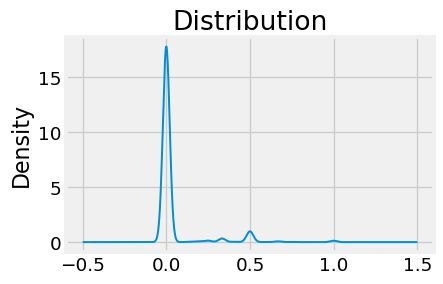

In [19]:
plt.figure(figsize= (5,3), dpi= 95)
plt.style.use('fivethirtyeight')

jeopardy['Ans in Ques'].plot.kde(title= 'Distribution', linewidth= 1.5)

plt.show()

In [20]:
# Mean of the 'Ans in Ques'
jeopardy['Ans in Ques'].mean()

0.043362608245852564

-   **So, from the kde plot and mean we see that only 4% of the answers might be deducible from question which would not be an effective way to take on. Let's look at the second pattern.**

**2. If there is any repeated question over the episode or not.** To do this, we will loop over each question, take some key words where word length might be 4 or higher and match with the previous question. 

In [21]:
jeopardy.head(2)

,Show Number,Air Date,Round,Category,Value,Question,Cleaned Question,Answer,Cleaned Answer,Ans in Ques
0,4680,2004-12-31,Jeopardy!,HISTORY,200,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",for the last 8 years of his life galileo was under house arrest for espousing this mans theory,Copernicus,copernicus,0.0
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",no 2 1912 olympian football star at carlisle indian school 6 mlb seasons with the reds giants braves,Jim Thorpe,jim thorpe,0.0


In [22]:
# Taking a list to store unique question.
question_overlap = []
terms_used = set()

# Comparing question with the previous one.
for item in jeopardy['Cleaned Question']:
    
    split_question = item.split()
    split_question = [q for q in split_question if len(q) > 4]
    c = 0
    for word in split_question:

        if word in terms_used:
            c += 1
        terms_used.add(word)

    if len(split_question) == 0:
        question_overlap.append(0)
    else:
        ans = c / len(split_question)
        question_overlap.append(ans)

In [23]:
# Inserting the new column next to 'Cleaned Question'
jeopardy.insert(7, 'Question Overlap', question_overlap)

In [24]:
jeopardy.head(2)

,Show Number,Air Date,Round,Category,Value,Question,Cleaned Question,Question Overlap,Answer,Cleaned Answer,Ans in Ques
0,4680,2004-12-31,Jeopardy!,HISTORY,200,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",for the last 8 years of his life galileo was under house arrest for espousing this mans theory,0.0,Copernicus,copernicus,0.0
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",no 2 1912 olympian football star at carlisle indian school 6 mlb seasons with the reds giants braves,0.0,Jim Thorpe,jim thorpe,0.0


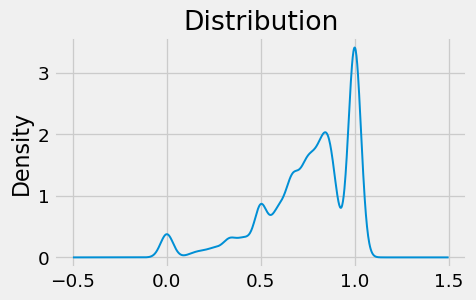

In [25]:
plt.figure(figsize= (5,3), dpi= 95)
plt.style.use('fivethirtyeight')

jeopardy['Question Overlap'].plot.kde(title= 'Distribution', linewidth= 1.5)

plt.show()

In [26]:
jeopardy['Question Overlap'].mean()

0.7531655965814631

-   **The question overlap are high enough, around 75% so it might be a good way to look at the previous question. Although there are some limitations because we have only taken the word length more than 4, have not includen phrase and many. We need further investigation to be more specific about this finding.**

# Analysis Part 2:

We can further refine this analysis by categorizing the questions as 'low-value' and 'high-value' and count the terms corresponding to high or low value questions using a chi-squared test. **The main goal of this part is when we take a question, what is the chance that it is from high value question.** 

- Low value -- Any row where Value is less than 800.
- High value -- Any row where Value is greater than 800.

You'll then be able to loop through each of the terms from the last screen, terms_used, and:

- Find the number of low value questions the word occurs in.
- Find the number of high value questions the word occurs in.
- Find the percentage of questions the word occurs in.
- Based on the percentage of questions the word occurs in, find expected counts.
- Compute the chi squared value based on the expected counts and the observed counts for high and low value questions. 

We can then find the words with the biggest differences in usage between high and low value questions, by selecting the words with the highest associated chi-squared values. Doing this for all of the words would take a very long time, so we'll just do it for a small sample now.

We will first create a function that takes in a row from a Dataframe, and: If the 'Cleaned Value' column is greater than 800, assigns 1 to value. Otherwise, assigns 0 to value. Return value. Apply function to the dataset jeopardy.

In [27]:
# Function to determine high low value
def high_low_value(value):
    if value >= 800:
        return 1
    else:
        return 0

# Creating a new column
jeopardy["High Value"] = jeopardy['Value'].apply(high_low_value)

In [28]:
jeopardy.tail(2)

,Show Number,Air Date,Round,Category,Value,Question,Cleaned Question,Question Overlap,Answer,Cleaned Answer,Ans in Ques,High Value
19997,3582,2000-03-14,Jeopardy!,1998 QUOTATIONS,200,"Before the grand jury she said, ""I'm really sorry for everything that's happened. And I hate Linda Tripp""",before the grand jury she said im really sorry for everything thats happened and i hate linda tripp,0.888889,Monica Lewinsky,monica lewinsky,0.0,0
19998,3582,2000-03-14,Jeopardy!,LLAMA-RAMA,200,Llamas are the heftiest South American members of this animal family,llamas are the heftiest south american members of this animal family,0.714286,Camels,camels,0.0,0


In [29]:
# Proportion of high value
jeopardy['High Value'].value_counts(normalize= True) * 100

0    56.427821
1    43.572179
Name: High Value, dtype: float64

- **From above it can be seen that about 44% questions are categorized as high-value. Since, we are interested in finding expected counts, we need to find total word count for questions categorized as high-value as well as low-value. We will write a function for that.**

In [30]:
# Function to determine the count of a word in 'High Value' and 'Low Value'
def count_word_in_high_low(word):
    high_count = 0
    low_count = 0
    for i, row in jeopardy.iterrows():
        split_question = row['Cleaned Question'].split()
        if word in split_question: 
            if row['High Value'] == 1:
                high_count += 1
            else:
                low_count += 1
    return high_count, low_count

In [31]:
# We obtained this set of all unique words earlier
terms_used = terms_used

-  As I mentioned before that our main goal of this part is when we take a question, what is the chance that it is from high value question. For the computational capability we will select 15 random words initially, then determine the observed and expected set to get the **Chi-square and P-value**

In [32]:
import random
terms_used_list = list(terms_used)

comparison_terms = []
for i in range(15):
    r = random.choice(terms_used_list)   # This function pick a word randomly
    comparison_terms.append(r)

print('Randomly Picked Words: ', comparison_terms, end= '\n\n')

# Observed set
observed_set = []

for item in comparison_terms:
    obs = count_word_in_high_low(item) 
    observed_set.append(obs)
    
print('Observed Set: ', observed_set)

Randomly Picked Words:  ['imaid', 'mismatched', 'brittle', 'zwoarer', 'duxbury', 'detached', 'hrefhttpwwwjarchivecommedia20060725_dj_24wmvkelly', 'igneous', 'novelist', 'fundy', 'seminoles', 'pistol', 'aquatic', 'tenochtitlan', 'anthem']

Observed Set:  [(1, 0), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (1, 0), (1, 1), (10, 7), (1, 1), (1, 2), (1, 1), (1, 2), (0, 1), (4, 9)]


Now it's time to determine the expected set. **The actual proportion of high value (1) and low value (0) in the 'High Value' column which is basically our expected value. So, the high count and low count proportion from observed set has to be same as the actual proportion.** To get that we have to follow the below step:
-  Firstly, calculate the total count (high count + low count) of each words from observed set. 
-  Divide this addition by total length.
-  Multiply the above result to actual high value count to get expected value for observed high value and multiply to actual low value count to get the expected value for observed low value.


In [33]:
jeopardy['High Value'].value_counts()

0    11285
1     8714
Name: High Value, dtype: int64

In [34]:
# Actual count of high and low value
high_value_total_count = jeopardy['High Value'].value_counts()[1]
low_value_total_count = jeopardy['High Value'].value_counts()[0]

In [35]:
# Importing the function to determine chi-square
from scipy.stats import chisquare

for item in observed_set:
    add = sum(item)
    
    # Calculation to get expected value
    high = (add / len(jeopardy)) * high_value_total_count
    low = (add / len(jeopardy)) * low_value_total_count
    
    # Assigning observed and expected set
    observed = list(item)
    expected = [high, low]
    
    chi_square, p_value = chisquare(observed, expected)
    print('Chi-square: ',chi_square, end= '\t\t\t')
    print('P_value: ', p_value)

Chi-square:  1.295042460408538			P_value:  0.2551207647961051
Chi-square:  0.7721754541426672			P_value:  0.3795448984353684
Chi-square:  0.7721754541426672			P_value:  0.3795448984353684
Chi-square:  0.7721754541426672			P_value:  0.3795448984353684
Chi-square:  0.7721754541426672			P_value:  0.3795448984353684
Chi-square:  0.7721754541426672			P_value:  0.3795448984353684
Chi-square:  1.295042460408538			P_value:  0.2551207647961051
Chi-square:  0.03360895727560264			P_value:  0.8545410902144307
Chi-square:  1.608284899637912			P_value:  0.20473306001130867
Chi-square:  0.03360895727560264			P_value:  0.8545410902144307
Chi-square:  0.1279147589930691			P_value:  0.7206039615746844
Chi-square:  0.03360895727560264			P_value:  0.8545410902144307
Chi-square:  0.1279147589930691			P_value:  0.7206039615746844
Chi-square:  0.7721754541426672			P_value:  0.3795448984353684
Chi-square:  0.8666839347763579			P_value:  0.35187497443487614


##### So, what we know that The chi-squared value tells us how much difference exists between our observed and expected value. If the Chi value is 0 then there is no difference but a low value means there is high correlation between the observed and expected set. Since we see that chi value are all lower than 5, so the chi-squared test isn't as valid.  

##### On the other hand, the P-value determine whether the distribution is due to chance or not. Since most of the value are greater that the standard 0.05, we can say the chance is random and which is not valid either.

## We obtained the wrong results because of the simulation on insufficients data. We need further investigation to  

In [37]:
jeopardy.head(3)

,Show Number,Air Date,Round,Category,Value,Question,Cleaned Question,Question Overlap,Answer,Cleaned Answer,Ans in Ques,High Value
0,4680,2004-12-31,Jeopardy!,HISTORY,200,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",for the last 8 years of his life galileo was under house arrest for espousing this mans theory,0.0,Copernicus,copernicus,0.0,0
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",no 2 1912 olympian football star at carlisle indian school 6 mlb seasons with the reds giants braves,0.0,Jim Thorpe,jim thorpe,0.0,0
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200,"The city of Yuma in this state has a record average of 4,055 hours of sunshine each year",the city of yuma in this state has a record average of 4055 hours of sunshine each year,0.0,Arizona,arizona,0.0,0


# An an extension of this project, we can look at one more column to find any pattern.

**Let's look at the 'Category' column if we could find anything.**

In [52]:
# Unique category
jeopardy['Category'].nunique()

3581

-   **We see that, there are almost 3581 unique category. So it is not the proper way to look at all category. we can find out top 10 category.**

In [78]:
jeopardy.Category.value_counts().sort_values(ascending= False)

TELEVISION           51
U.S. GEOGRAPHY       50
LITERATURE           45
AMERICAN HISTORY     40
BEFORE & AFTER       40
                     ..
2004                  1
THE CONSTITUTION      1
THE WORLD OF ART      1
THE BOOK TRADE        1
RULERS IN HISTORY     1
Name: Category, Length: 3581, dtype: int64

### Since highest number of appeared question from a category is 51, we can find the category where appeared question is at least 30.

First 28 values are above or equal to 30.


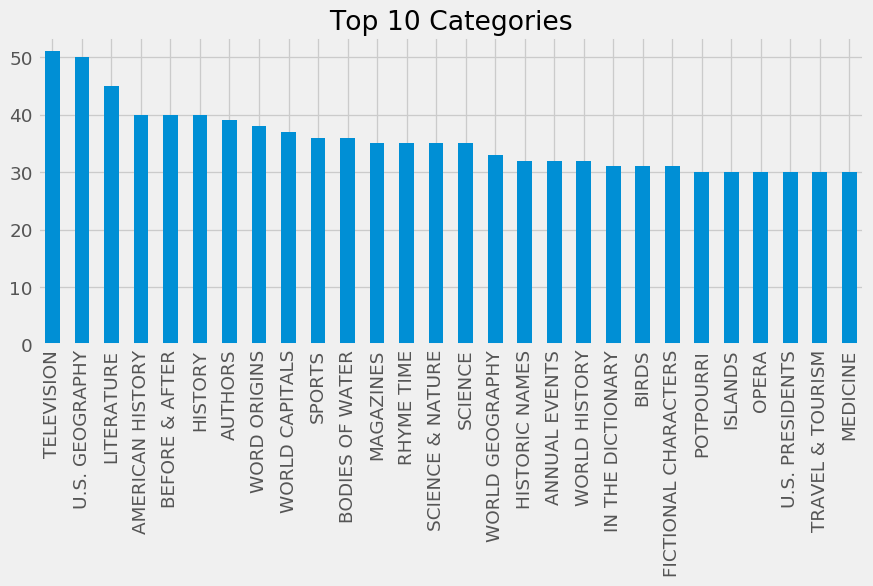

In [82]:
# Taking the values as a list
value = list(jeopardy.Category.value_counts().sort_values(ascending= False))

# finding the categories which are more than 29.
for i, item in enumerate(value) :
    head = i
    if item < 30:
        break;
print(f'First {head} values are above or equal to 30.')

# PLotting the category
plt.figure(figsize=(10,4), dpi= 95)
jeopardy.Category.value_counts().sort_values(ascending= False).head(head).plot.bar(title= 'Top 10 Categories')

plt.show()

### Although, we have not been able to find out any question pattern yet because of the computational capability but we can at least study on this most common categories before attending the show.

# That's all for this project. Thank you so much for spending time here. I would really appreciate if you leave some feedbback.  